## Setup and Input

In [1]:
from tqdm import tqdm
from base import *
from compute import *
from memory import *
from moe_projection import *


# ["Llama2-7B", "Llama2-13B", "Mixtral-8x7B", "GLaM-1.2T", "MoE-1.8T"]
model_name = "Llama2-7B"

device_list = ["Gaudi2C"]
device_pp_list = [1, 1, 1, 1, 1, 1, 1]
device_tp_list = [8]  # [1, 2, 4, 8, 16]
dtype_list = ["bf16"]  # ["bf16", "fp8"]
batchsize_list = [1, 2, 4, 8, 16, 32, 64]  # , 128, 129, 256, 512] # 129
context_list = [{"in": 128, "out": 2048}]
# context_list = [{"in": 128, "out": 128}, {"in": 1024, "out": 1024}, {
#     "in": 1, "out": 2048}, {"in": 32000, "out": 512}]

## Compute Projection

### Prefill / Decode (Plot / Perf Table / Bound Analysis)

projection prefill with dtype[bf16], device [Gaudi2C] with seq_len: [{'in': 128, 'out': 2048}] and bs [1, 2, 4, 8, 16, 32, 64]...


100%|█| 7/7 [00:00<00:00,


done!

projection decoding with dtype[bf16], device [Gaudi2C] with seq_len: [{'in': 128, 'out': 2048}] and bs [1, 2, 4, 8, 16, 32, 64]...


100%|█| 7/7 [00:00<00:00,

done!
                                                             prefill                                                              
-------  ----------  ------  -------  ---------  --------  -------  ------  ---  ----  -----  --  ----------  ----------------------
Device   HiddenSize  HeadsQ  HeadsKV  InterSize  Decoding  Experts  Layers  In   Out   DType  BS  Latency(s)  Throughput(tokens/sec)
Gaudi2C  4096        32      32       11008      False     1        32      128  2048  bf16   1   0.01        137.08
Gaudi2C  4096        32      32       11008      False     1        32      128  2048  bf16   2   0.01        164.96
Gaudi2C  4096        32      32       11008      False     1        32      128  2048  bf16   4   0.02        164.96
Gaudi2C  4096        32      32       11008      False     1        32      128  2048  bf16   8   0.05        164.96
Gaudi2C  4096        32      32       11008      False     1        32      128  2048  bf16   16  0.1         164.96
Gaudi2C  409

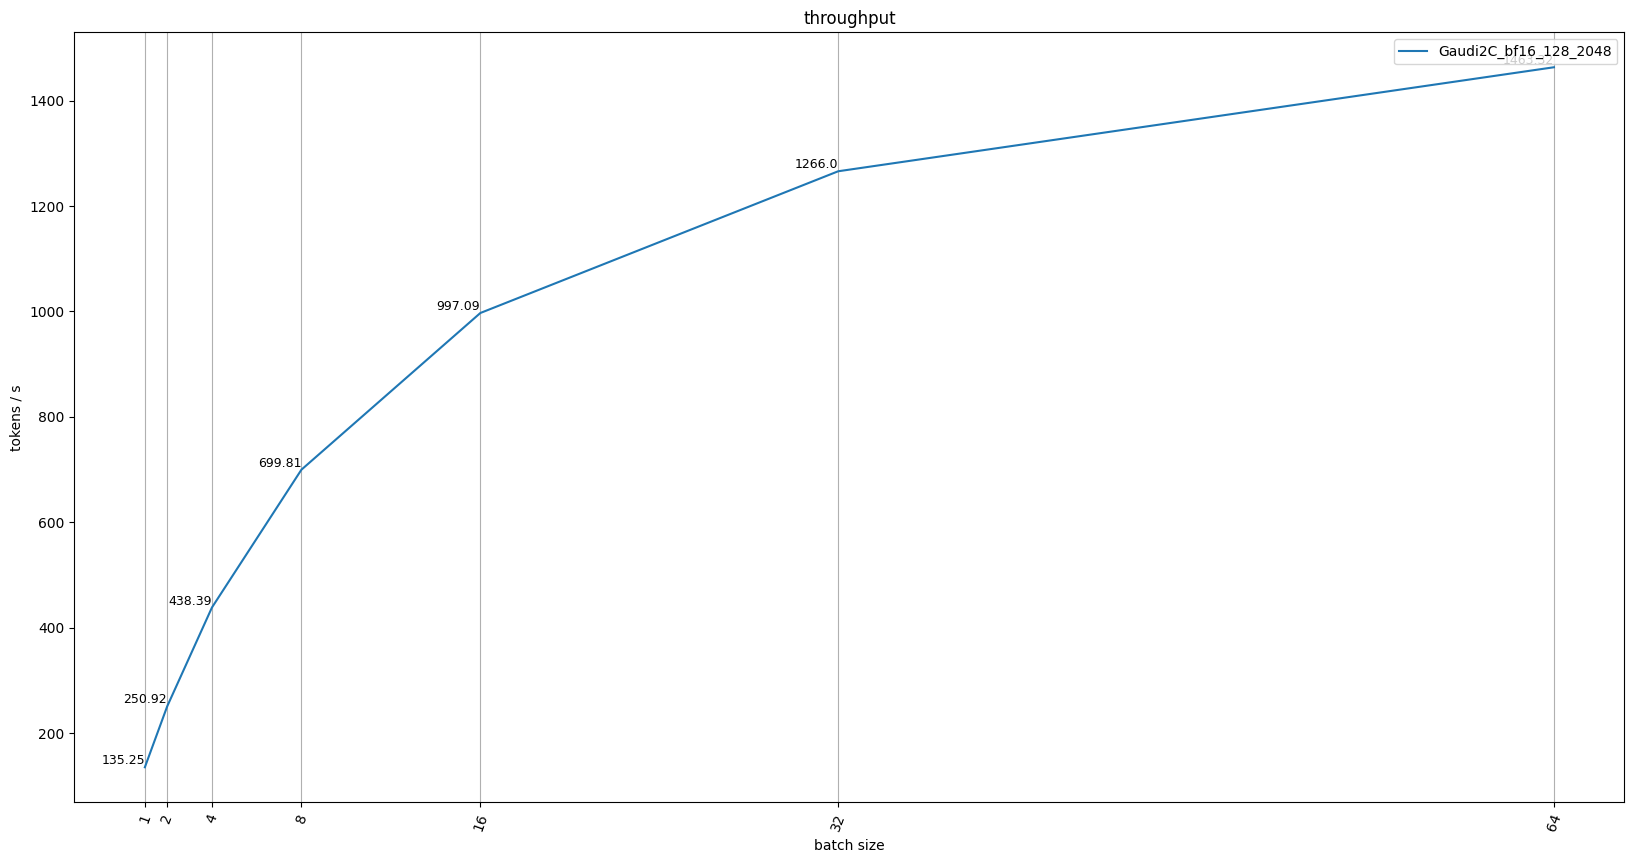

<Figure size 640x480 with 0 Axes>

In [2]:
compute_analyzer(model_name, device_list, dtype_list, batchsize_list, context_list)

## Memory Projection

In [3]:
context_list = [{"in": 2048, "out": 2048}]
# len_factor = 1024
# input_list = [2*len_factor]
# context_length_list = [pow(2, i) * len_factor for i in range(2, 6)]
# for input in input_list:
#     for context_len in context_length_list:
#         output = context_len - input
#         context_list.append({"in": input, "out": output})
memory_analyzer(model_name, device_list, device_pp_list, device_tp_list, dtype_list, batchsize_list, context_list)

memory usage with dtype[bf16], device [Gaudi2C] with seq_len: [{'in': 2048, 'out': 2048}] and bs [1, 2, 4, 8, 16, 32, 64]...



100%|█| 7/7 [00:00<00:00,


done!

memory usage with dtype[bf16], device [Gaudi2C] with seq_len: [{'in': 2048, 'out': 2048}] and bs [1, 2, 4, 8, 16, 32, 64]...



100%|█| 7/7 [00:00<00:00,


done!

memory usage with dtype[bf16], device [Gaudi2C] with seq_len: [{'in': 2048, 'out': 2048}] and bs [1, 2, 4, 8, 16, 32, 64]...



100%|█| 7/7 [00:00<00:00,


done!

memory usage with dtype[bf16], device [Gaudi2C] with seq_len: [{'in': 2048, 'out': 2048}] and bs [1, 2, 4, 8, 16, 32, 64]...



100%|█| 7/7 [00:00<00:00,


done!

memory usage with dtype[bf16], device [Gaudi2C] with seq_len: [{'in': 2048, 'out': 2048}] and bs [1, 2, 4, 8, 16, 32, 64]...



100%|█| 7/7 [00:00<00:00,


done!

memory usage with dtype[bf16], device [Gaudi2C] with seq_len: [{'in': 2048, 'out': 2048}] and bs [1, 2, 4, 8, 16, 32, 64]...



100%|█| 7/7 [00:00<00:00,


done!

memory usage with dtype[bf16], device [Gaudi2C] with seq_len: [{'in': 2048, 'out': 2048}] and bs [1, 2, 4, 8, 16, 32, 64]...



100%|█| 7/7 [00:00<00:00,

done!

-------  --  --  ----------  ------  ----  ----  -----  --  -----------  -----------  -----------  ---------  ----------
Device   PP  TP  NumDevices  Layers  In    Out   DType  BS  Weights(GB)  KVcache(GB)  Activat(GB)  Total(GB)  Fit2Device
Gaudi2C  1   8   8           32      2048  4096  bf16   1   1.51         0.02         0.06         1.57       True
Gaudi2C  1   8   8           32      2048  4096  bf16   2   1.51         0.03         0.12         1.63       True
Gaudi2C  1   8   8           32      2048  4096  bf16   4   1.51         0.06         0.25         1.76       True
Gaudi2C  1   8   8           32      2048  4096  bf16   8   1.51         0.12         0.5          2.01       True
Gaudi2C  1   8   8           32      2048  4096  bf16   16  1.51         0.25         1.0          2.51       True
Gaudi2C  1   8   8           32      2048  4096  bf16   32  1.51         0.5          2.0          3.51       True
Gaudi2C  1   8   8           32      2048  4096  bf16   64  1